### problem statement
     Based on the pima Indians historical diabetes data,build a machine learning binary classification model to predict if the person is diabetic or Not based on Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,    BMI,DiabeticPedigreeFunction,Age these features and Outcome is our label

In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import warnings 
warnings.filterwarnings('ignore')
import pickle

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data.shape

(768, 9)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [39]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
data.sample(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
205,5,111,72,28,0,23.9,0.407,27,0
61,8,133,72,0,0,32.9,0.270,39,1
198,4,109,64,44,99,34.8,0.905,26,1
52,5,88,66,21,23,24.4,0.342,30,0
265,5,96,74,18,67,33.6,0.997,43,0
128,1,117,88,24,145,34.5,0.403,40,1
311,0,106,70,37,148,39.4,0.605,22,0
525,3,87,60,18,0,21.8,0.444,21,0
64,7,114,66,0,0,32.8,0.258,42,1
400,4,95,64,0,0,32.0,0.161,31,1


In [ ]:
# there are no null values in the dataset
# data set contains integer and float data type

In [41]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# it seems there are no missing values in the dataset
# also minimum value is showing 0 for all the featchers which technically cant be true, wiil have to fix this issue
#pregnancy can be 0

### Data Preprocessing 
Data cleaning, 
EDA(Analysis),
Finding and Treating outliers, 
Feature selection for model building,
Data Standardisation, 

In [43]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())


In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
# the Ratio of mean and std doesn't match, std should as less as possible for that we will have to see how data is distributed for all the columns
# by visualising data distribution we can identify if any skewness is present

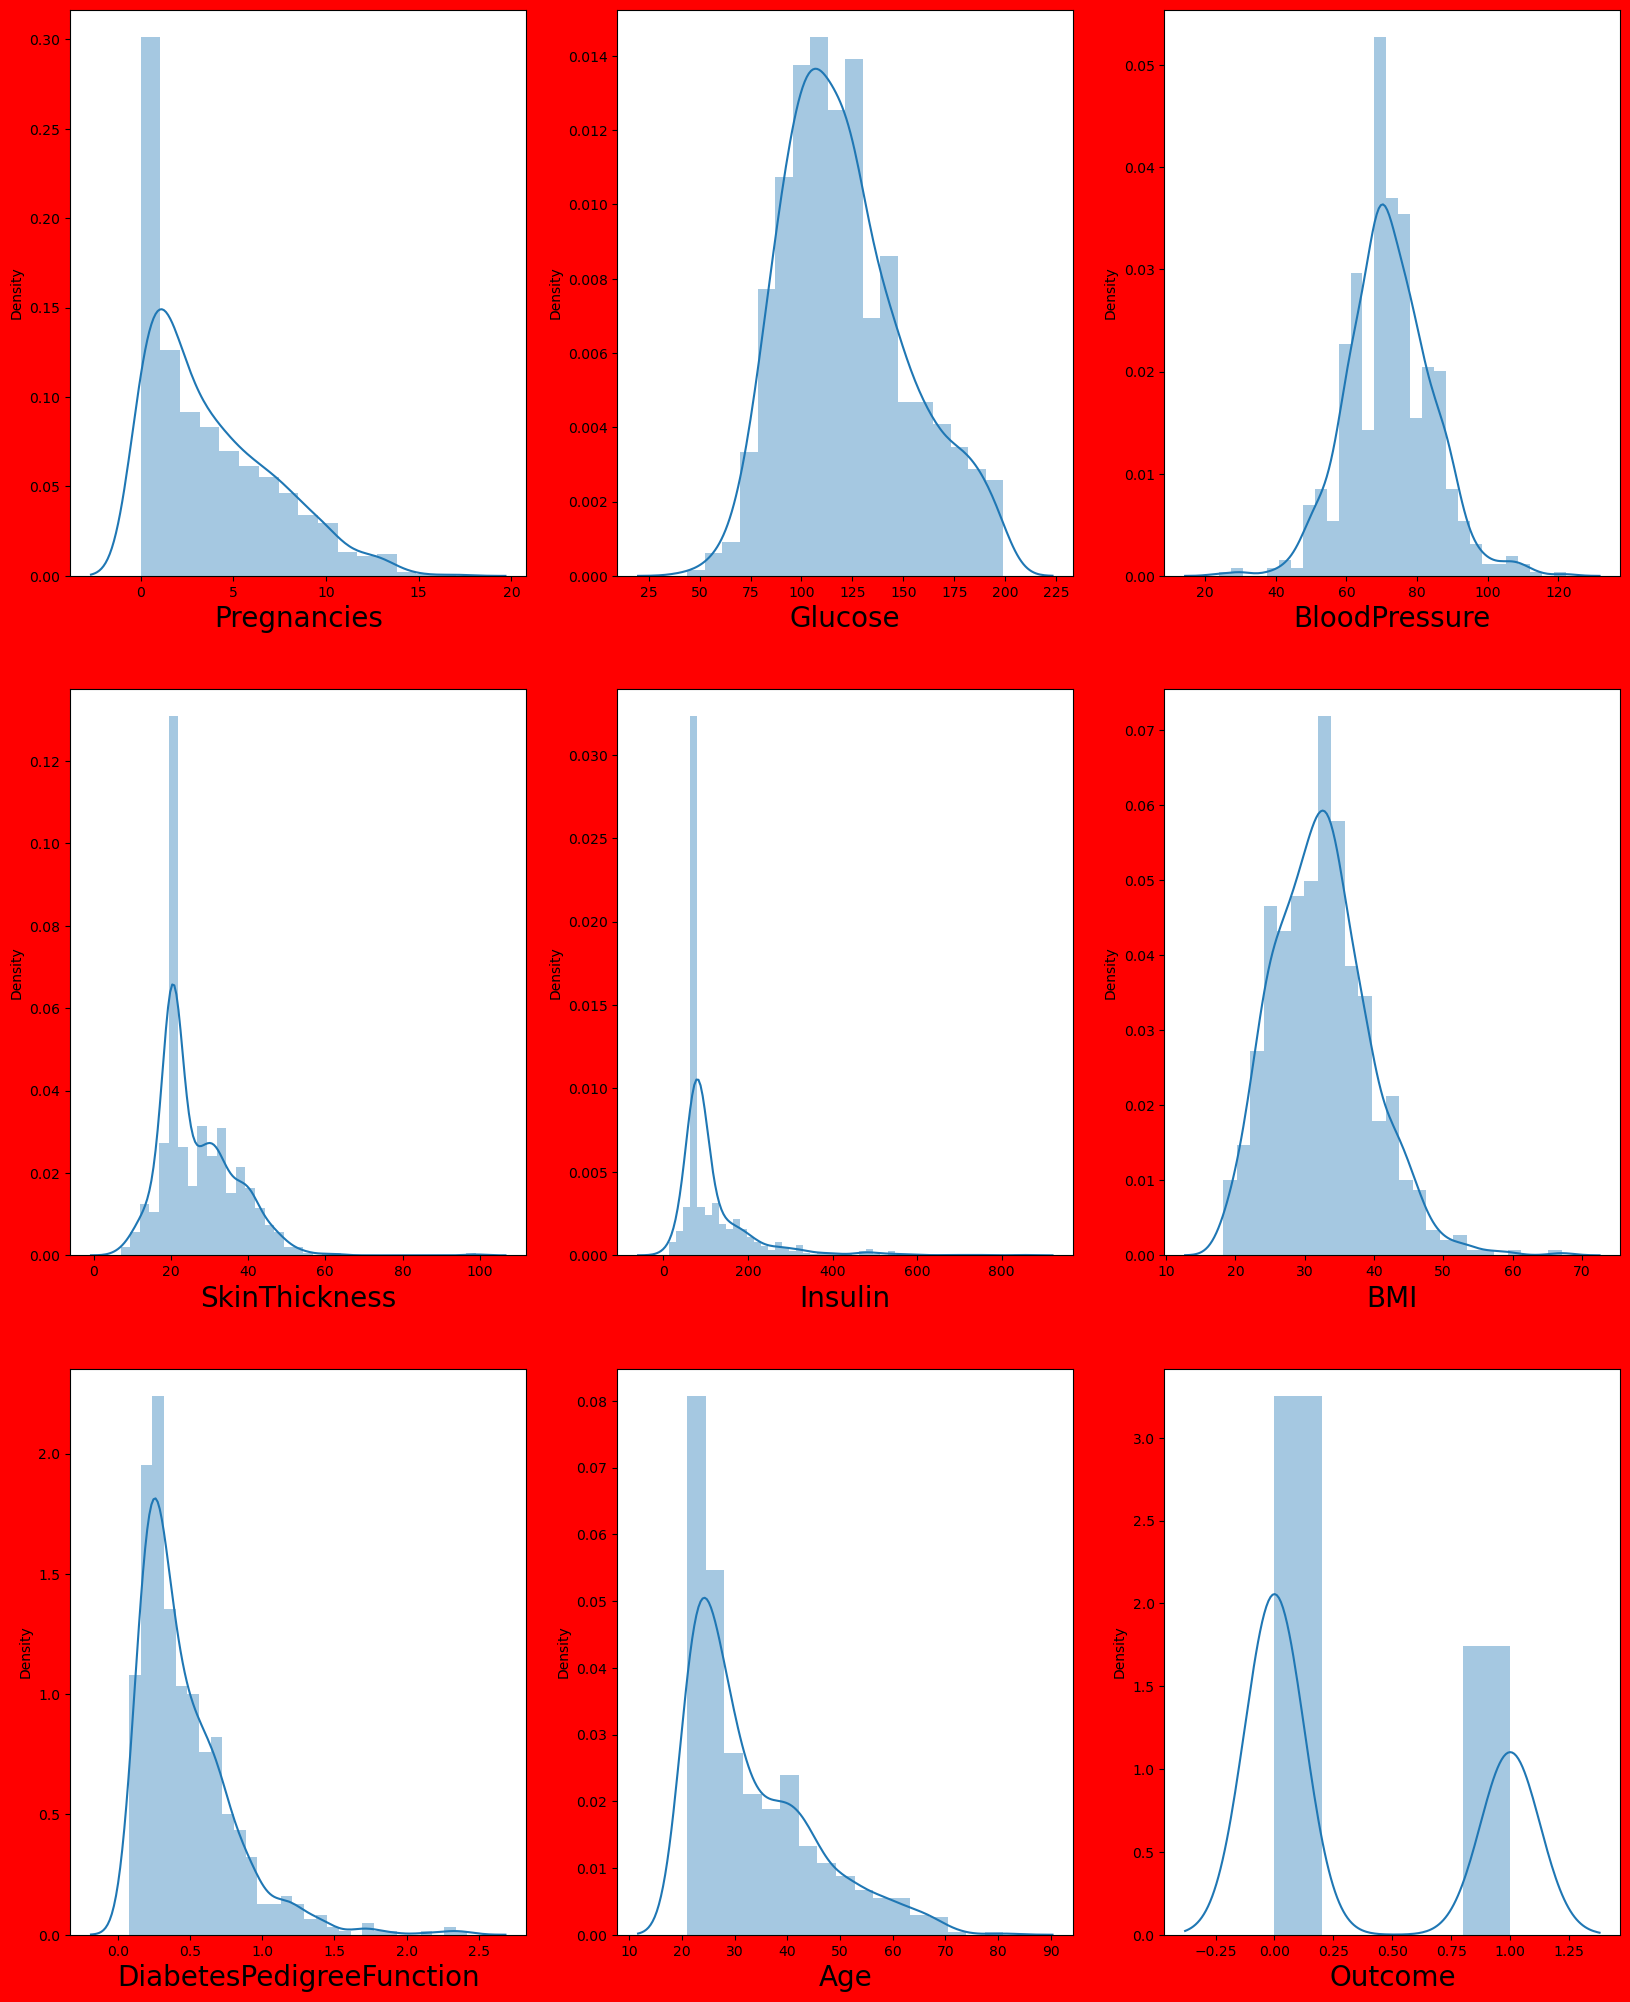

In [46]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(20, 25), facecolor='red')

plotnumber = 1
for column in data: 
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber) 
        sns.distplot(data[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

In [47]:
# Through above graphs we can see there is a Skewness in graphs which indicates that ther are  outliers  present 
#in some of the features like BloodPressure,Skinthickness,insulin,BMI,DiabetesPedigreeFunction
#Let's deal with these outliers

In [48]:
df_features = data.drop('Outcome',axis=1)

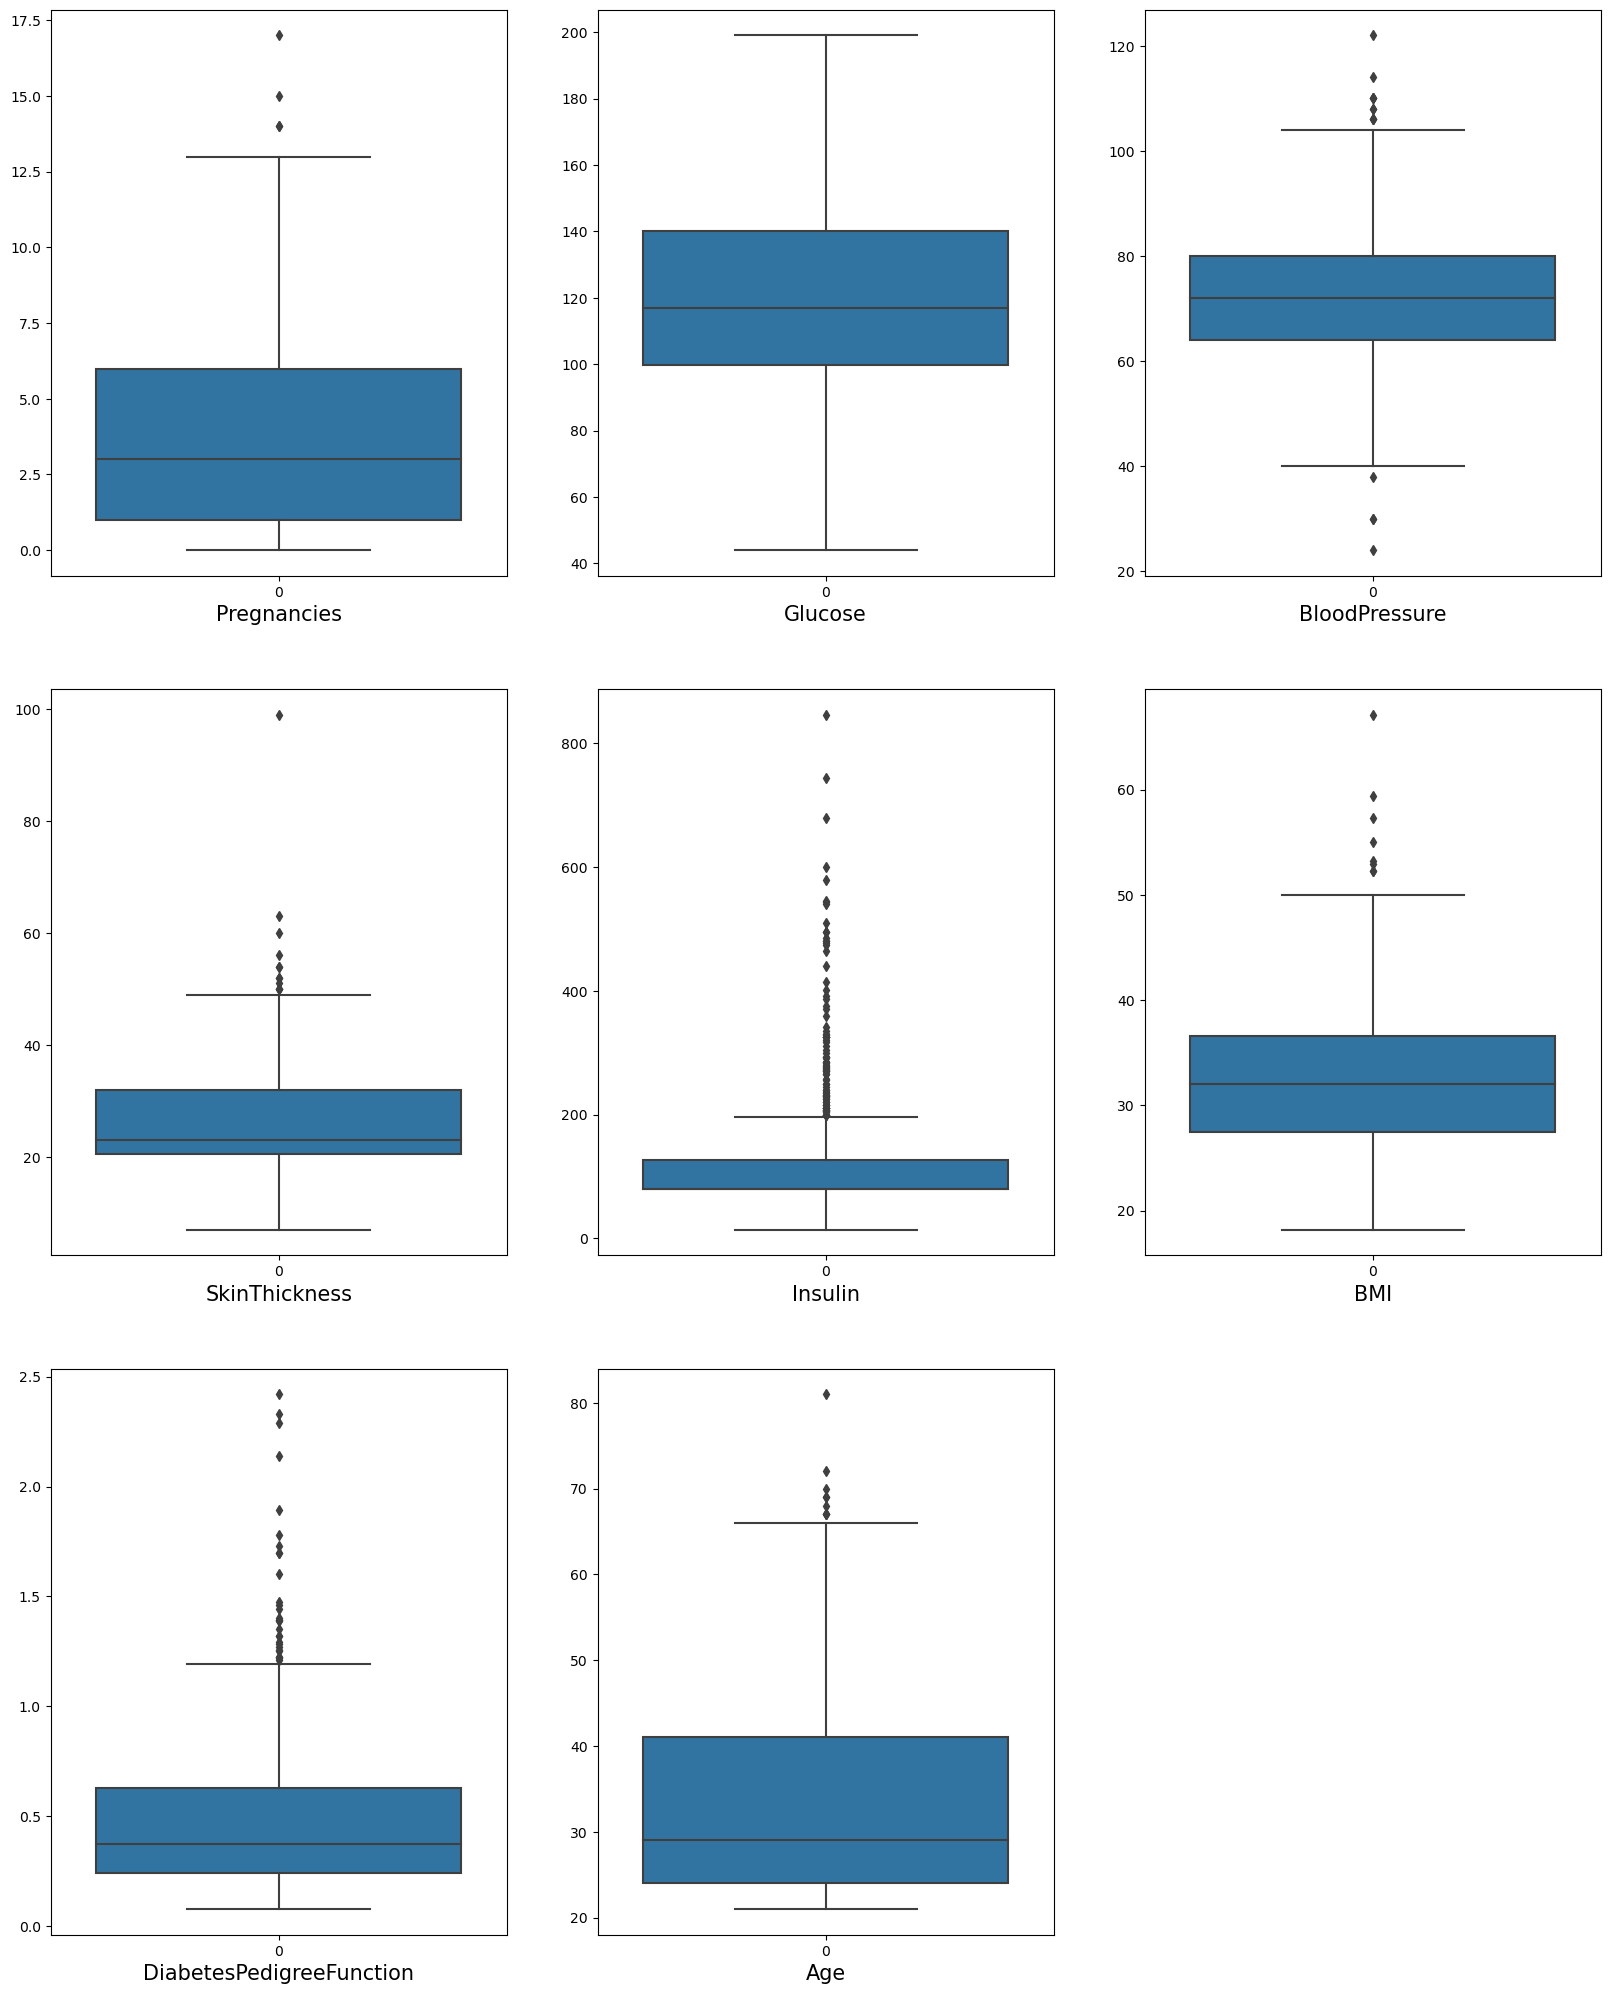

In [49]:
# visualising outliers using Boxplot
plt.figure(figsize=(20,25))
graph = 1
for column in df_features:
    if graph <=9:
        plt.subplot(3,3,graph)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [50]:
#IQR METHOD to find the outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1


In [51]:
Q1

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [52]:
Q3

Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

In [53]:
# Treating outliers in Pregnancies column (as Pregnancy is a discrete data we should consider a reality and current situation)
preg_high = (Q3.Pregnancies+(1.5*IQR.Pregnancies)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(preg_high)

#check the index which have higher values
np_index = np.where(data['Pregnancies']>preg_high) 
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])

print(data.shape)

# resetting the index
data.reset_index()

13.5
(array([ 88, 159, 298, 455]),)
(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [54]:
# Treating outliers bloodpressure column

bp_high = (Q3.BloodPressure+(1.5*IQR.BloodPressure)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(bp_high)

#check the index which have higher values
np_index = np.where(data['BloodPressure']>bp_high)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

104.0
(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687]),)
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [55]:
# Treating outliers SkinThickness column

st_high = (Q3.SkinThickness+(1.5*IQR.SkinThickness)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(st_high)

#check the index which have higher values
np_index = np.where(data['SkinThickness']>st_high)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

49.1953125
(array([ 56,  84,  96, 116, 146, 205, 267, 269, 437, 523, 569, 581]),)
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [56]:
# Treating outliers Insulin column

insu_high = (Q3.Insulin+(1.5*IQR.Insulin)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(insu_high)

#check the index which have higher values
np_index = np.where(data['Insulin']>insu_high)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

198.42578125
(array([  8,  13,  16,  20,  31,  39,  52,  53,  55,  71,  90, 104, 124,
       131, 136, 144, 152, 175, 184, 188, 195, 203, 208, 216, 219, 235,
       236, 242, 246, 265, 272, 273, 282, 283, 294, 305, 320, 344, 345,
       348, 354, 359, 372, 376, 379, 393, 396, 399, 408, 409, 435, 440,
       462, 467, 468, 469, 493, 501, 519, 521, 526, 527, 535, 541, 554,
       563, 572, 584, 586, 590, 623, 633, 635, 648, 654, 660, 669, 674,
       681, 684, 687, 689, 695, 722, 727]),)
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [57]:
# Treating outliers BMI column

bmi_high = (Q3.BMI+(1.5*IQR.BMI)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(bmi_high)

#check the index which have higher values
np_index = np.where(data['BMI']>bmi_high)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

50.25
(array([105, 164, 254]),)
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [58]:
# Treating outliers DiabetesPedigreeFunction column

dpf_high = (Q3.DiabetesPedigreeFunction+(1.5*IQR.DiabetesPedigreeFunction)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(dpf_high)

#check the index which have higher values
np_index = np.where(data['DiabetesPedigreeFunction']>dpf_high)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

1.2
(array([  4,  11,  38,  47,  83, 123, 157, 182, 204, 206, 216, 244, 256,
       276, 311, 322, 454, 502, 523, 526, 527, 560, 562]),)
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [59]:
# Treating outliers Age column

age_high = (Q3.Age+(1.5*IQR.Age)) #using higher side outlier detection formula [q3+(1.5*iqr)]
print(age_high)

#check the index which have higher values
np_index = np.where(data['Age']>age_high)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

66.5
(array([ 98, 291, 366, 370, 396, 440, 543, 549, 558]),)
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [60]:
# treating lowerside outliers in BloodPressure column


bp_low = (Q1.BloodPressure-(1.5*IQR.BloodPressure)) #using lowerside outlier detection formula [q1-(1.5*iqr)]
print(bp_low)

#check the index which have higher values
np_index = np.where(data['BloodPressure']<bp_low)
print(np_index)

# drop the index which we found in above cell
data = data.drop(data.index[np_index])
print(data.shape)

# resetting the index
data.reset_index()

40.0
(array([ 13, 481, 483]),)
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


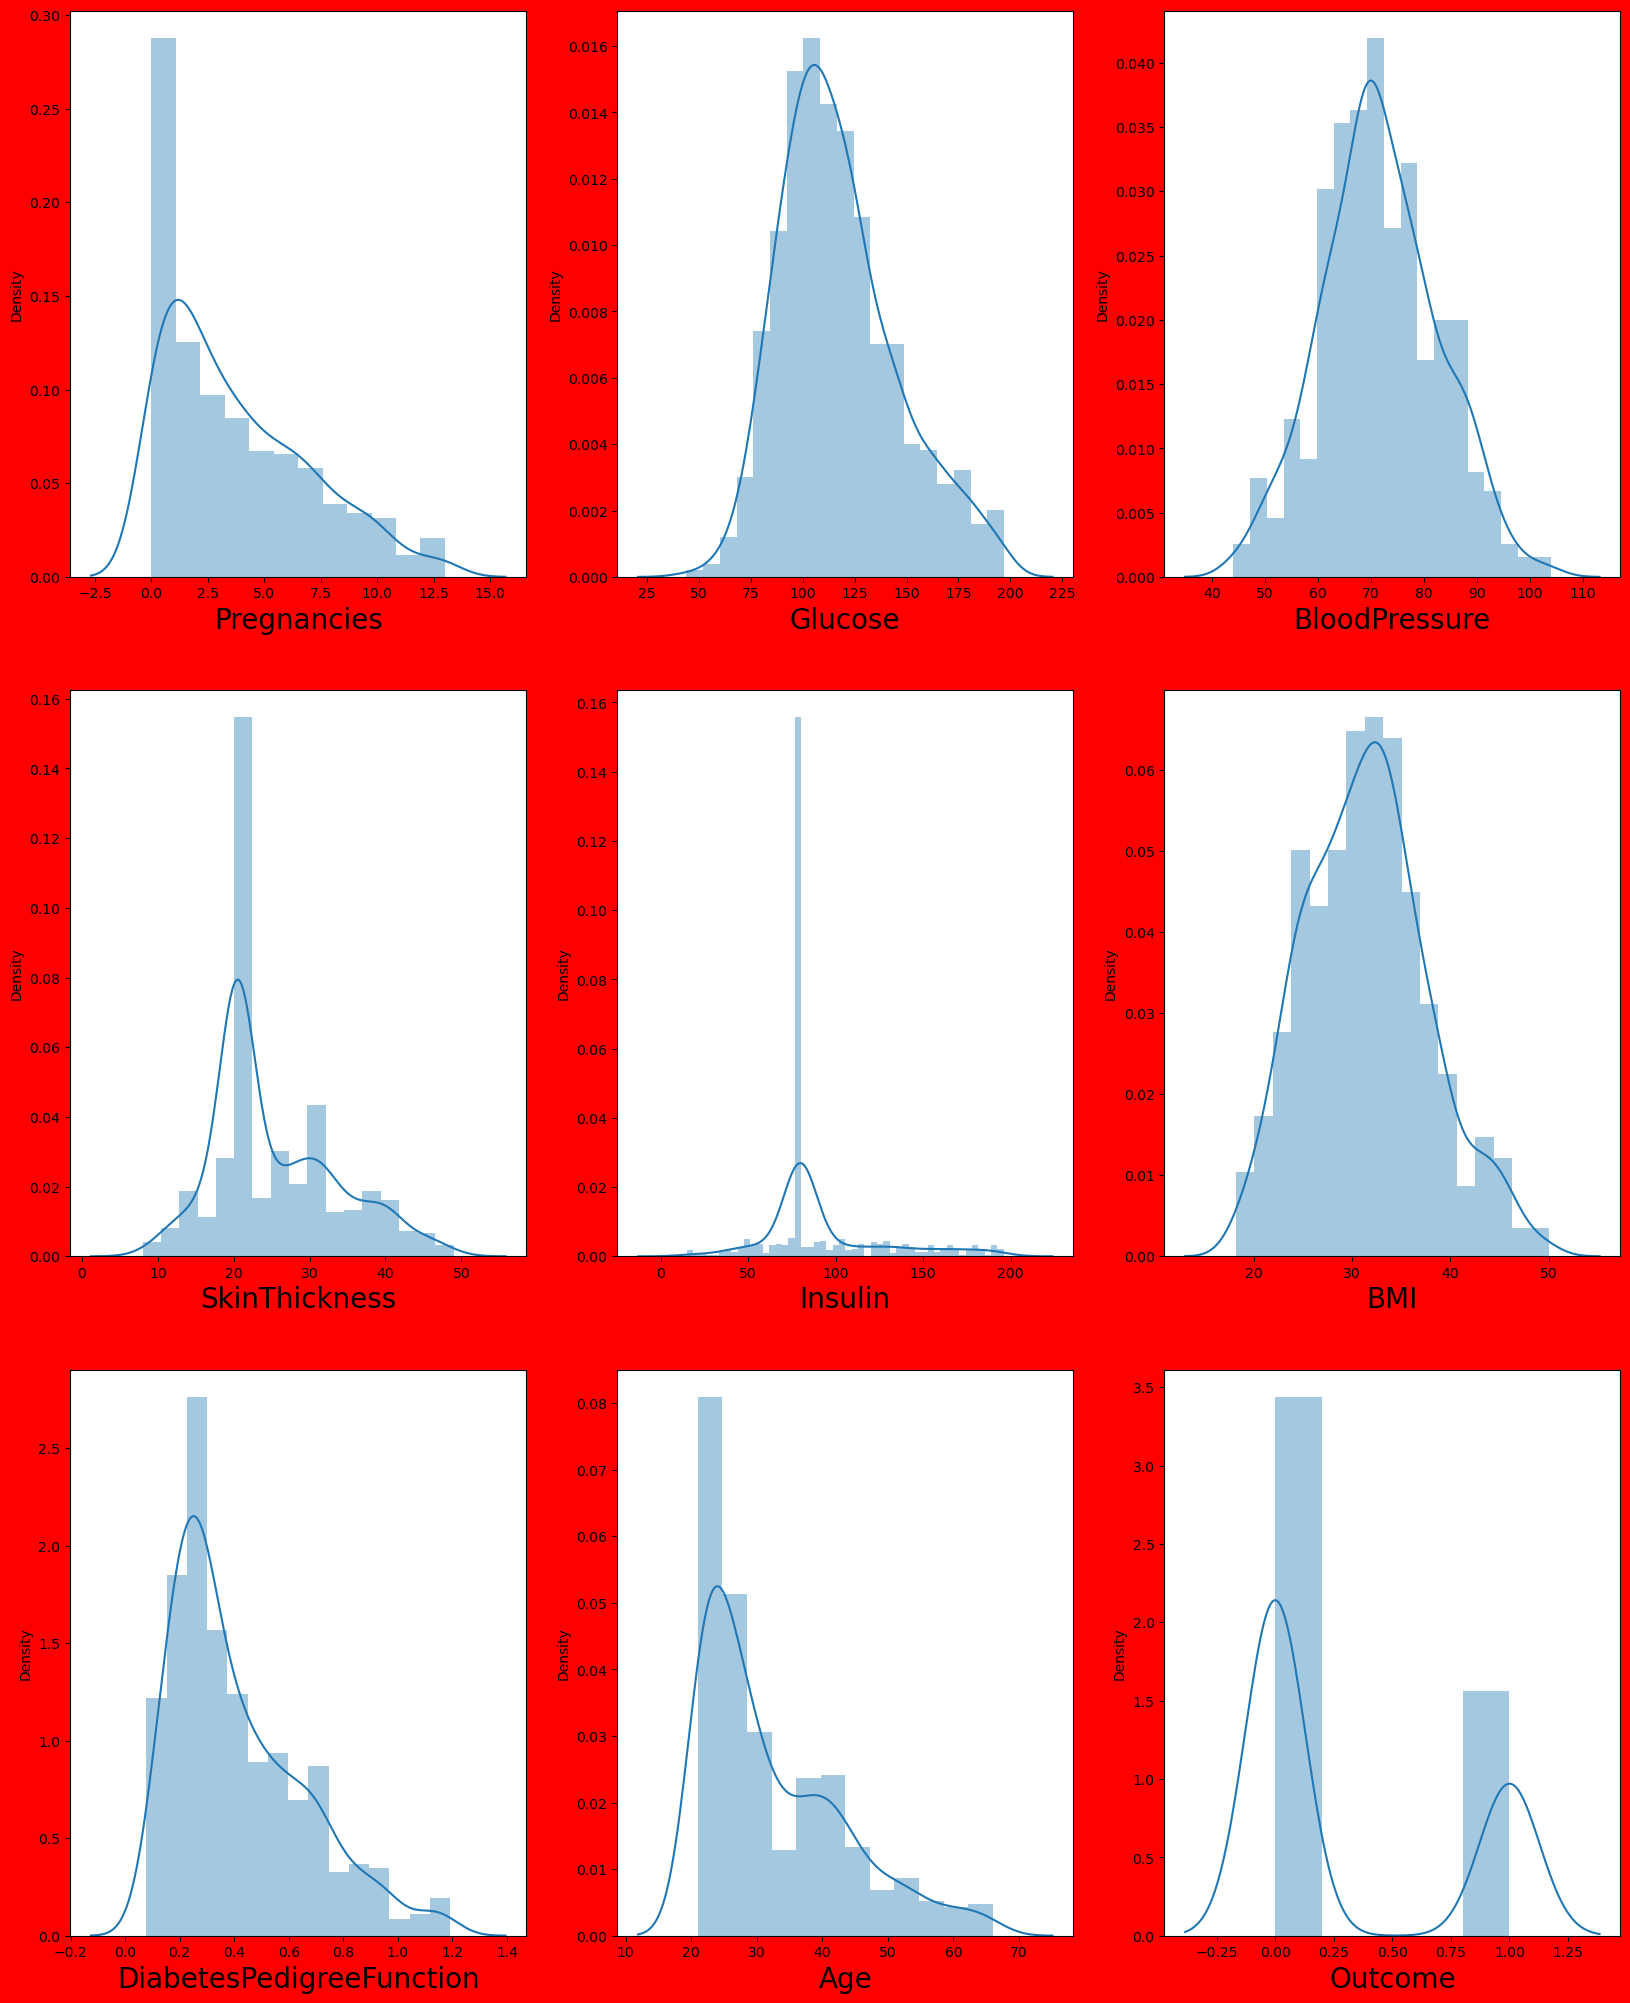

In [61]:
# lets visualise the data distribution through graphs
plt.figure(figsize=(20, 25), facecolor='red')

plotnumber = 1
for column in data: 
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber) 
        sns.distplot(data[column])  
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.show()

In [62]:
# the data looks much better than before,as we can see bell shape curve in the graph.We will start our analysis with this data as we dont want to loose Important information 
#if our model doesn't work with Accuracy, we will come back for more accuracy 

### finding relationship: we want to keep only those features which have Relationship with label

In [63]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [64]:
# before we fit our data to a model, let's visualise the relationship between our independent Variable and the Categories 

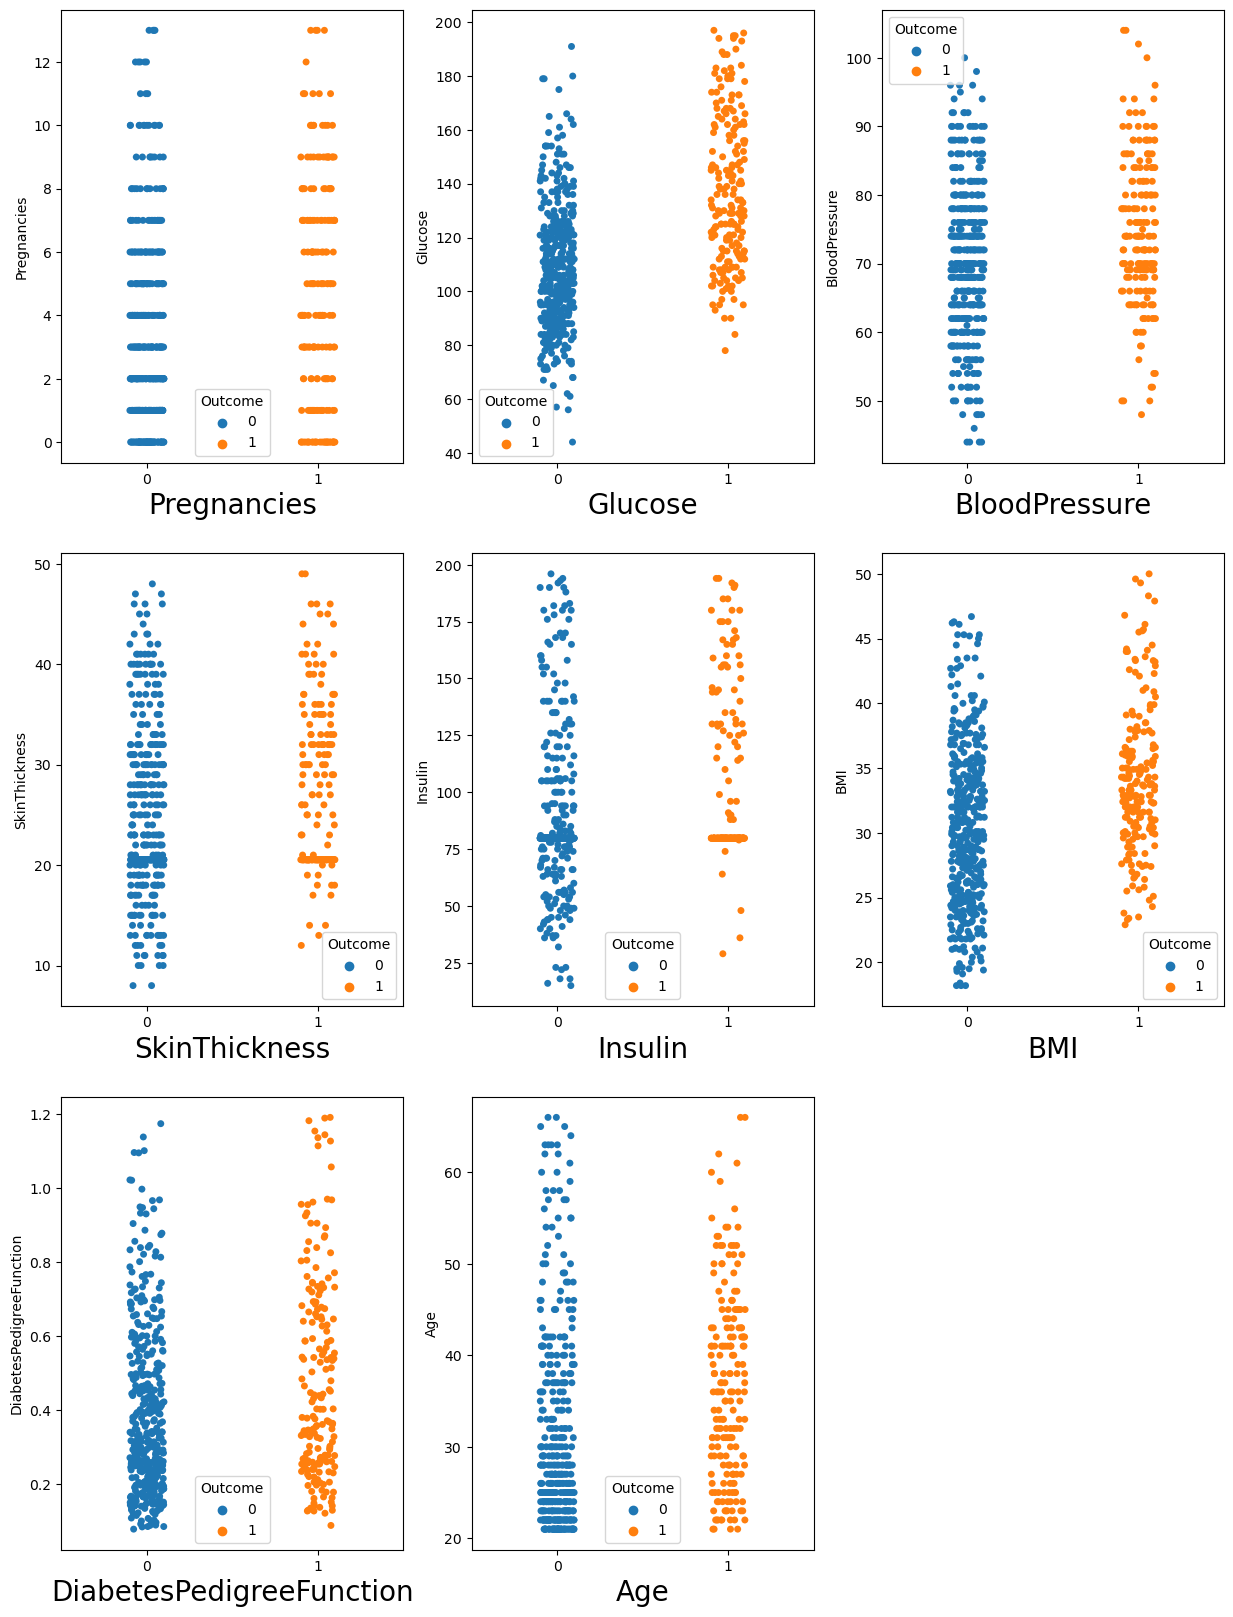

In [65]:
#let's see how features are related to class
# here our laabel is Categorical and not contentious that's why we will be using stripplot for visualising relationship 
plt.figure(figsize=(15, 20))

plotnumber = 1
for column in X: 
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber) 
        sns.stripplot(x=y,y=X[column],hue=y)  
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.show()

### Let's check multicollinearity Problem to find if one of feature is dependent on another feature.

In [66]:
# now we will check the multicollinearity in the dependant variables.before that we should scale our data. Let's use the standard scaler for that

In [68]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [70]:
# this is how our data looks after scaling.Now we will check multicollinearity using VIF (variance inflation factor)

In [71]:
X_scaled.shape[1] # the 1 in the code will help us to show 1st index only which is all 8 Features.if we don't mention 1 here it will show all rows and columns 

8

In [72]:
# finding variance inflation factor in each scaled column ex. X_scaled.shape[1] (1/(1-R2))

In [73]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns 
# lets check the values
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


In [74]:
# threshold for VIF score is project specific, her we are Taking 5 as a threshold for VIF score.
# all the VIF values are less than 5 and are very low that means no multicollinearity.now we can go ahead with fitting our data to the model before that Let's splitt our data in test and  training set

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 355)

### pre-processing steps are completed

### model building

In [76]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [78]:
# let's see how well our model performance on test data set. Let's work on the prediction part

In [90]:
y_pred = log_reg.predict(x_test)

In [91]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0])

In [81]:
# above are predictions about patients if they are healthy person (0) or diabetic(1)

In [82]:
# logistic regression depends on probability,the more the probability the result leans more to that probability/to the highest probability dpending upon this model assign 1 or 0 Outcome to the records lets understand this with predict_probability 

In [84]:
log_reg.predict_proba(x_test)

array([[0.27644852, 0.72355148],
       [0.9884465 , 0.0115535 ],
       [0.71320913, 0.28679087],
       [0.41727663, 0.58272337],
       [0.65256166, 0.34743834],
       [0.16747081, 0.83252919],
       [0.67217673, 0.32782327],
       [0.96760466, 0.03239534],
       [0.83090765, 0.16909235],
       [0.70960968, 0.29039032],
       [0.61236335, 0.38763665],
       [0.82448072, 0.17551928],
       [0.55924335, 0.44075665],
       [0.52295435, 0.47704565],
       [0.25325268, 0.74674732],
       [0.97019571, 0.02980429],
       [0.49845311, 0.50154689],
       [0.91072363, 0.08927637],
       [0.97768536, 0.02231464],
       [0.64897542, 0.35102458],
       [0.52870881, 0.47129119],
       [0.78479246, 0.21520754],
       [0.78466007, 0.21533993],
       [0.44685677, 0.55314323],
       [0.75832183, 0.24167817],
       [0.35577336, 0.64422664],
       [0.69081478, 0.30918522],
       [0.62136906, 0.37863094],
       [0.94699644, 0.05300356],
       [0.64984246, 0.35015754],
       [0.

In [85]:
# above code shows us on what basis model is predicting 0 or 1. so in above output we can see 2 columns of 0th and 1st label
# if we look at 1st record, we can see 1st label has more probability than 0th label, so model will predict 1 this is how model will predict based on highest probability

In [86]:
# so with predict_proba we can tell the confidence percentage of the prediction. Ex. like in above ex. 1st label has highest probability of .72 it means model is predicting that record as 1 with 72% of confidence 

In [92]:
# model Accuracy 
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [93]:
# so over all accuracy of our model is 76%

In [94]:
# Confusion Matrix 
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]])

In [95]:
#we can calculate accuracy score manually as well, accuracy = (tp+tn)/(tp+tn+fp+fn) to use this formula we have to use above outputs of confusion matrix 
            

In [96]:
# now we need to find recall, precision and F1 score, for that instead of importing all these matrix individually we can simply 
# import classification_report matrix, we can use this matrix to check all the matrix of classification model

In [97]:
#lets check classification report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



In [98]:
# in above classification report as this is disease related data set Instead of accuracy score we should focus more on recall and precision score

In [105]:
# checking the accuracy for RandomForestClasifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)


RandomForestClassifier()

In [106]:
rfc_pred = RFC.predict(x_test)

In [107]:
rfc_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0])

In [108]:
# model Accuracy 
rfc_accuracy = accuracy_score(y_test,rfc_pred)
rfc_accuracy

0.7612903225806451

In [109]:
# Confusion Matrix 
rfc_conf_mat = confusion_matrix(y_test,rfc_pred)
rfc_conf_mat

array([[91, 14],
       [23, 27]])

In [110]:
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.66      0.54      0.59        50

    accuracy                           0.76       155
   macro avg       0.73      0.70      0.71       155
weighted avg       0.75      0.76      0.75       155



In [111]:
# checking the accuracy for support vector machine classifier (svc)
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

0.7741935483870968
[[95 10]
 [25 25]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.71      0.50      0.59        50

    accuracy                           0.77       155
   macro avg       0.75      0.70      0.72       155
weighted avg       0.77      0.77      0.76       155



In [112]:
# checking the accuracy for Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB_pred = GB.predict(x_test)
print(accuracy_score(y_test,GB_pred))
print(confusion_matrix(y_test,GB_pred))
print(classification_report(y_test,GB_pred))


0.7612903225806451
[[92 13]
 [24 26]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.67      0.52      0.58        50

    accuracy                           0.76       155
   macro avg       0.73      0.70      0.71       155
weighted avg       0.75      0.76      0.75       155



In [113]:
# checking accuracy for AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))


0.7290322580645161
[[92 13]
 [29 21]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       105
           1       0.62      0.42      0.50        50

    accuracy                           0.73       155
   macro avg       0.69      0.65      0.66       155
weighted avg       0.71      0.73      0.71       155



In [114]:
# checking accuracy for BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred = bc.predict(x_test)
print(accuracy_score(y_test,bc_pred))
print(confusion_matrix(y_test,bc_pred))
print(classification_report(y_test,bc_pred))


0.7225806451612903
[[90 15]
 [28 22]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       105
           1       0.59      0.44      0.51        50

    accuracy                           0.72       155
   macro avg       0.68      0.65      0.66       155
weighted avg       0.71      0.72      0.71       155



In [ ]:
print(accuracy_score(y_test,abc_pred))

In [132]:
print('accuracy score for LogisticRegression =',(accuracy_score(y_test,y_pred)))
print('accuracy score for RandomForestClassifier =',(accuracy_score(y_test,rfc_pred)))
print('accuracy score for AdaBoostClassifier =',(accuracy_score(y_test,abc_pred)))
print('accuracy score for SVC =',(accuracy_score(y_test,svc_pred)))
print('accuracy score for GradientBoostingClassifier =',(accuracy_score(y_test,GB_pred)))
print('accuracy score for BaggingClassifier =',(accuracy_score(y_test,bc_pred)))


accuracy score for LogisticRegression = 0.7612903225806451
accuracy score for RandomForestClassifier = 0.7612903225806451
accuracy score for AdaBoostClassifier = 0.7290322580645161
accuracy score for SVC = 0.7741935483870968
accuracy score for GradientBoostingClassifier = 0.7612903225806451
accuracy score for BaggingClassifier = 0.7225806451612903


### cross validation score

In [128]:
from sklearn.model_selection import cross_val_score


In [130]:
# checking the cv score for LogisticRegression
score = cross_val_score(log_reg,X,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is = ",accuracy_score(y_test,y_pred)-score.mean())

[0.77419355 0.75806452 0.78225806 0.7983871  0.81300813]
0.7851822711775505
Difference between accuracy score and cross validation score is =  -0.023891948596905355


In [131]:
# checking the cv score for RandomForestClassifier
score = cross_val_score(RFC,X,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is = ",accuracy_score(y_test,rfc_pred)-score.mean())

[0.74193548 0.75806452 0.76612903 0.80645161 0.74796748]
0.7641096249672173
Difference between accuracy score and cross validation score is =  -0.002819302386572242


In [133]:
# checking the cv score for AdaBoostClassifier
score = cross_val_score(abc,X,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is = ",accuracy_score(y_test,abc_pred)-score.mean())

[0.77419355 0.72580645 0.77419355 0.76612903 0.75609756]
0.7592840283241543
Difference between accuracy score and cross validation score is =  -0.03025177025963821


In [134]:
# checking the cv score for SVC
score = cross_val_score(svc,X,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is = ",accuracy_score(y_test,svc_pred)-score.mean())

[0.76612903 0.72580645 0.77419355 0.78225806 0.79674797]
0.7690270128507737
Difference between accuracy score and cross validation score is =  0.005166535536323069


In [135]:
# checking the cv score for GradientBoostingClassifier
score = cross_val_score(GB,X,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is = ",accuracy_score(y_test,GB_pred)-score.mean())

[0.78225806 0.70967742 0.7983871  0.78225806 0.77235772]
0.7689876737477052
Difference between accuracy score and cross validation score is =  -0.007697351167060051


In [136]:
# checking the cv score for BaggingClassifier
score = cross_val_score(bc,X,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is = ",accuracy_score(y_test,bc_pred)-score.mean())

[0.73387097 0.75       0.75       0.80645161 0.76422764]
0.7609100445843168
Difference between accuracy score and cross validation score is =  -0.03832939942302649


In [137]:
# according to cross validation score RandomForestClassifier has a least difference between accuracy score and cv score, hence
# RandomForestClassifier is our best performing model Because cross validation score is validating that RandomForestClassifier has highest accuracy 

### hyper parameter tuning

In [138]:
# RandomForestClassifier
parameters = {'criterion':['gini','entropy'],
             'random_state':[10,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [139]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)


In [140]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [141]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [142]:
final_model = RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=100,n_jobs=-2,random_state=50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

78.06451612903226


### Plotting ROC and compare AUC for all the models used

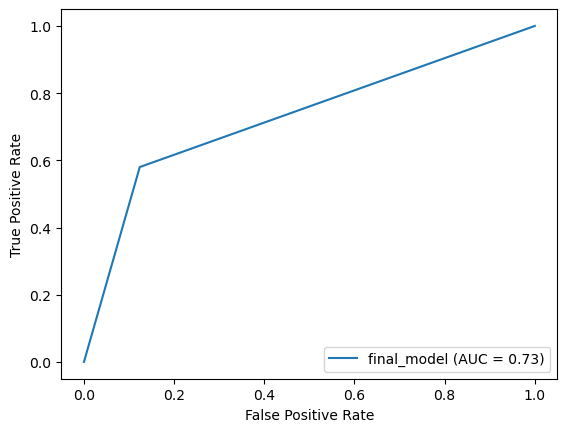

In [152]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='final_model')
display.plot()


In [153]:
# here we have plotted the ROC curve for final model and AUC value of final model is 73%

### saving the model

In [154]:
#saving the model using .pkl
import joblib
joblib.dump(final_model,'diabetic_patient_prediction.pkl')

['diabetic_patient_prediction.pkl']

### predicting the saved model

In [157]:
# Let's load the saved model and get the predictions
model = joblib.load('diabetic_patient_prediction.pkl')

# Predictions
prediction = model.predict(x_test)
print(prediction)


[0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 0]


In [158]:
a = np.array(y_test)
df = pd.DataFrame()
df["predicted"]= prediction
df['Original'] = a
df

,predicted,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
150,1,1
151,1,1
152,0,0
153,0,1
